In [1]:
import numpy as np
import pandas as pd 
import nltk

In [2]:
df=pd.read_csv('/Users/vallirajasekar/Desktop/NLP_PROJECT/Spam_Classifier/spam.csv')

In [3]:
#df=pd.read_csv('/Users/vallirajasekar/Desktop/NLP_PROJECT/Spam_Classifier/spam.csv',encoding='ISO-8859-1')

In [4]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [5]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Preprocessing in NLP Data 
-- Lowering the Format

-- Tokenization

-- Remove Stop words

-- Remove Non Alphabetical letter/ Characters 

-- Stemming/ Lemmetization

-- Spell Correction

In [6]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd 
from autocorrect import Speller



In [7]:
#pip install autocorrect


In [8]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
df.rename({'v1':'Spam/Ham','v2':'Text'},axis=1)

,Spam/Ham,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
df.rename(columns={'v1':'labels','v2':'Messages'},inplace=True)

In [11]:
df

,labels,Messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Lets Visualize the Spam Words

In [12]:
from wordcloud import WordCloud,wordcloud

In [13]:
import matplotlib.pyplot as plt

In [14]:
spam_words = ' '.join(list(df[df['labels'] == 'spam']['Messages']))


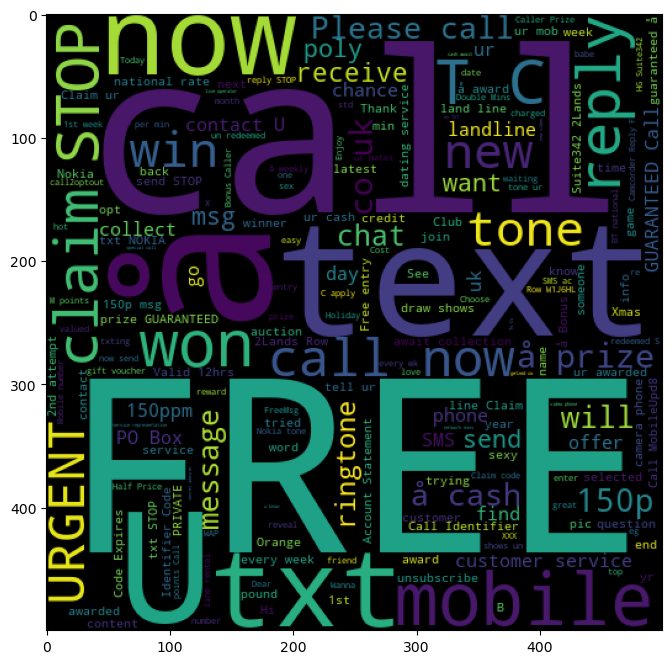

In [15]:
spam_wc=WordCloud(width=500,height=500,contour_color='Red').generate(spam_words)
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()

In [16]:
## Lets Visualize the Ham Words

In [17]:
ham_words = ' '.join(list(df[df['labels'] == 'ham']['Messages']))


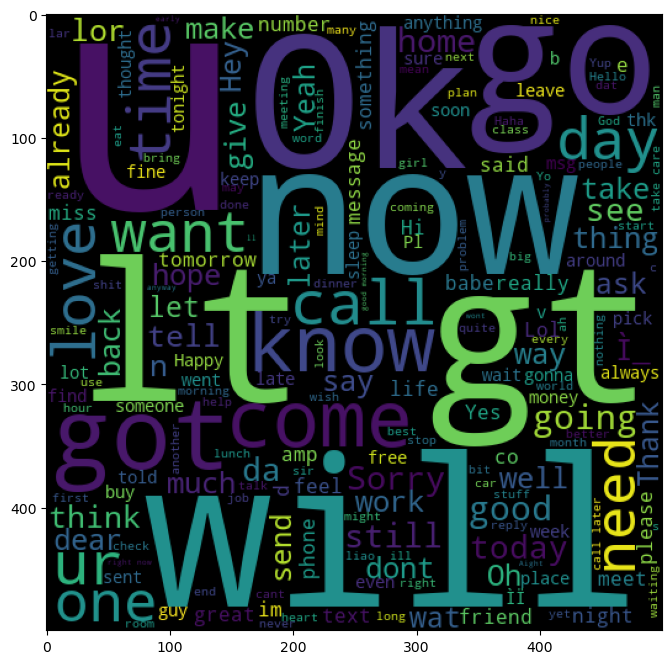

In [18]:
ham_wc=WordCloud(width=500,height=500).generate(ham_words)
plt.figure(figsize=(10,8))
plt.imshow(ham_wc)
plt.show()

## Preprocessing in NLP Data 
-- Lowering the Format

-- Tokenization

-- Remove Stop words

-- Remove Non Alphabetical letter/ Characters 

-- Stemming/ Lemmetization

-- Spell Correction

In [19]:
import re

In [20]:
txt='hi this is the a sekar'

In [21]:
word_tokenize(txt)

['hi', 'this', 'is', 'the', 'a', 'sekar']

In [22]:
#stopwords.words('english')

In [23]:
#stopwords.words('arabic')

# Preprocessing in NLP Data for above Data 

In [24]:
df.head()

,labels,Messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
df.shape

(5572, 2)

In [26]:
spell=Speller()

In [27]:
stemmer=PorterStemmer()

In [28]:
from tqdm import tqdm 

In [29]:
data=[]

for i in range(df.shape[0]):
    lines=df.iloc[i,1]
    lines=re.sub('[^A-Za-z]',' ',lines)
    lines=lines.lower()
    tokenized_lines=word_tokenize(lines)
    processed=[]
    for i in tokenized_lines:
        if i not in set(stopwords.words('english')):
            processed.append(spell(stemmer.stem(i)))
            
    final_lines=' '.join(processed)
    data.append(final_lines)


In [30]:
#data

In [31]:
processed

['roll', 'true', 'name']

In [32]:
df

,labels,Messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [33]:
pd.DataFrame(data).shape

(5572, 1)

## Encoding the Labels 

In [34]:
df['labels']=df['labels'].apply(lambda x:1 if x=='spam' else 0)

In [35]:
df

,labels,Messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [36]:
y=df['labels']

In [37]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: labels, Length: 5572, dtype: int64

## Splitting the Data into Training and Texting 

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test=train_test_split(data,y,test_size=0.25,)

In [40]:
y_test.shape

(1393,)

# Vectorizing using Bag of Words


In [41]:
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
matrix=CountVectorizer()

In [43]:
X_train_vect=matrix.fit_transform(X_train).toarray()

In [44]:
X_test_vect=matrix.transform(X_test).toarray()

In [45]:
X_train_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Lets Train Our Model -- Naive Bayes 

In [46]:
X_train_vect.shape

(4179, 4496)

In [47]:
X_test_vect.shape

(1393, 4496)

In [48]:
y_train.shape

(4179,)

In [49]:
from sklearn.naive_bayes import GaussianNB

In [50]:
model=GaussianNB()

In [51]:
model.fit(X_train_vect,y_train)

GaussianNB()

In [52]:
model.class_count_

array([3622.,  557.])

In [53]:
model.score(X_train_vect,y_train)

0.9038047379755922

In [54]:
model.score(X_test_vect,y_test)

0.8391959798994975

In [59]:
y_pred=model.predict(X_test_vect)

In [58]:
y_test

3548    0
1159    0
5361    0
2610    0
4384    1
       ..
3854    1
493     0
4608    0
1082    0
2360    0
Name: labels, Length: 1393, dtype: int64

In [60]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [61]:
accuracy_score(y_test,y_pred)

0.8391959798994975

In [62]:
confusion_matrix(y_test,y_pred)

array([[1001,  202],
       [  22,  168]])

In [63]:
confusion_matrix(y_test,y_pred,labels=[1,0])

array([[ 168,   22],
       [ 202, 1001]])

In [56]:
tokenized_lines

['rofl', 'its', 'true', 'to', 'its', 'name']

In [57]:
lines

'rofl  its true to its name'